# STA 208: Homework 2
This is based on the material in Chapters 3, 4.4 of 'Elements of Statistical Learning' (ESL), in addition to lectures 4-6.  Chunzhe Zhang came up with the dataset and the analysis in the second section.

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

# 1. Conceptual Exercises

__Exercise 1.1.__ (5 pts) Ex. 3.29 in ESL 

### Exercise 1.1
Given $X_1=X_{n\times1}$, then $a=\hat {\beta_1}=(X_1^TX_1+\lambda I)^{-1}X_1^{T}Y$. By copying $X^*=X$, the new fitted ridge regression coefficient can be written as:
$$\hat {\beta_2}=\left[\left[\begin{array}{cc}X^TX&X^TX\\X^TX&X^TX \end{array}\right]+\lambda I\right]^{-1} \left[\begin{array}{c}X^TY\\X^TY\end{array}\right]$$
Take $Z=X^TX$,$$\hat {\beta_2}=\left[\begin{array}{cc}Z+\lambda&Z\\Z&Z+\lambda \end{array}\right]^{-1} \left[\begin{array}{c}X^TY\\X^TY\end{array}\right]=\frac{1}{\lambda^2+2\lambda Z}\left[\begin{array}{c}X^TY\\X^TY\end{array}\right]$$
So both efficients are identical and the coefficients are $\frac{X^TY}{\lambda^2+2\lambda Z}$.

For $m$ copies of a variable $X_j$ are included in a ridge regression, $\left[\begin{array}{cccc}X,&X,&\dots,&X\end{array}\right]_{n\times m}$, the corresponding ridge coefficients $\hat \beta=\left[\begin{array}{cccc}\hat {\beta_1},&{\hat \beta_2},&\dots,&{\hat \beta_n}\end{array}\right]$. Using a heuristic manner as follows: first we interchange the $X_i$ and $X_j$, for $i,j=1,2,\dots,n$, next implement the ridge regression for the new modifed $X$ matrix. Since all the columns are the same, the modified regression coefficients should remain constant.Hence, the proof is completed.



__Exercise 1.2__ (5 pts) Ex. 3.30 in ESL

### Exercise 1.2

In this problem, $X$ is augmented with a $p\times p$ Identity matrix. The argumented matrix is: $X_{new}=\left[\begin{array}{c}X\\\gamma I\end{array}\right]$. Accordingly,$X_{new}\beta=\left[\begin{array}{c}X\beta\\\gamma\beta\end{array}\right]$. The response matrix $y$ is augmented with $p$ zeros as:  $y_{new}=\left[\begin{array}{c}y\\0\end{array}\right]$. Then $$||y_{new}-X_{new}\beta||_2^2=||y-X\beta||_2^2+\gamma^2||\beta||_2^2$$
So the lasso solution of the augmented version of $X$ and $y$ is:$$\hat{\beta}=\underset{\beta}{\operatorname{argmin}}(||y_{new}-X_{new}\beta||_2^2+\lambda_{new}||\beta||_1)$$
Compared to the solution with the original variable $$\hat{\beta}=\underset{\beta}{\operatorname{argmin}}(||y-X\beta||_2^2+\gamma^{2}||\beta||_2^2+\lambda_{new}||\beta||_1)$$

Take $\gamma^2=\lambda\alpha$ and $\lambda_{new}=\lambda (1-\alpha)$. Incorporating these relationships with the lasso solution, the following can be obtained:$$\hat{\beta}=\underset{\beta}{\operatorname{argmin}}(||y-X\beta||_2^2+\lambda\left[\alpha||\beta||_2^2+\left(1-\alpha\right)||\beta||_1)\right]$$
Thus, the desired solution is obtained.



__Exercise 1.3__ (5 pts) $Y \in \{0,1\}$ follows an exponential family model with natural parameter $\eta$ if
$$P(Y=y) = \exp\left( y \eta - \psi(\eta) \right).$$
Show that when $\eta = x^\top \beta$ then $Y$ follows a logistic regression model.

### Exercise 1.3

In this problem, the following probability with $\eta=x^T\beta$ can be obtained:
$$P(Y=0)=exp\left(-\psi\left(\eta\right)\right);$$
$$P(Y=1)=exp\left(\eta-\psi\left(\eta\right)\right)$$
Given $P(Y=0)+P(Y=1)=1$, we can get $\psi\left(\eta\right)=\ln{\left[1+exp\left(\eta\right)\right]}.$
$$\frac{P\left(Y=1\right)}{P\left(Y=0\right)}=exp\left[\eta-\psi\left(\eta\right)+\psi\left(\eta\right)\right]=exp\left(\eta\right)=exp\left(x^T\beta\right).$$ Then$$\ln{\frac{P\left(Y=1\right)}{P\left(Y=0\right)}}=\eta=x^T\beta $$
Therefore, $Y$ follows a logistic regression model given $\eta=x^T\beta$.

# 2. Data Analysis

In [1]:
import numpy as np
import pandas as pd

# dataset path
data_dir = "."

Load the following medical dataset with 750 patients. The response variable is survival dates (Y), the predictors are 104 measurements measured at a specific time (numerical variables have been standardized).

In [4]:
sample_data = pd.read_csv(data_dir+"/hw2.csv", delimiter=',')

In [5]:
sample_data.head()

,Y,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104
0,1498,No,0.171838,-0.081764,-1.448868,-1.302547,-0.143061,-0.339784,-1.206475,0.444493,...,-1.379066,0.420436,-0.827446,0.318695,-0.787409,0.351406,-0.836107,0.015502,0.435444,-0.879906
1,334,Yes,-0.605767,-0.584360,-0.485169,-0.848111,-0.493546,-0.392332,-0.239788,0.421697,...,0.398840,-0.434789,-0.698862,1.387219,0.948456,0.191397,1.451699,-1.243616,-0.699072,1.751434
2,845,Yes,-0.266330,-0.126965,0.138401,0.262732,-0.202438,0.397194,0.137790,0.047847,...,-0.450999,-0.627830,0.677158,-0.140255,-0.798641,-0.972419,-0.852035,0.080914,-1.906252,0.705509
3,1484,No,0.113498,0.893293,-0.825298,-0.444168,0.756242,0.179122,-1.145078,-1.471261,...,0.316312,0.131010,0.878134,-0.306249,-1.263270,1.316120,-0.999717,1.104161,-0.234038,-0.083488
4,301,Yes,-0.620454,-0.608036,-0.088352,0.111253,-0.598898,-0.513191,0.753000,1.055418,...,0.364884,0.251667,0.373787,-0.354599,0.085019,1.207509,-0.762206,-0.067318,0.158247,0.592638


In [6]:
sample_data.V1 = sample_data.V1.eq('Yes').mul(1)

The response variable is Y for 2.1-2.3 and Z for 2.4. 

In [7]:
X = np.array(sample_data.iloc[:,range(2,104)])
y = np.array(sample_data.iloc[:,0])
z = np.array(sample_data.iloc[:,1])

__Exercise 2.1__ (10 pts) Perform ridge regression on the method and cross-validate to find the best ridge parameter.

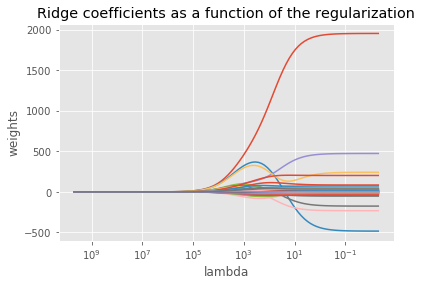

In [163]:
### Exercise 2.1
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import cross_validation
from sklearn.linear_model import Ridge,RidgeCV
%matplotlib inline
plt.style.use('ggplot')

alphas=10**np.linspace(10,-2,100)*0.5 # possible lambda for ridge regression
coefs=[]
ridge=Ridge()
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X),y)
    coefs.append(ridge.coef_)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [167]:
#### for cross-validation
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.4,random_state=23)
ridgecv=RidgeCV(alphas=alphas,cv=10,scoring='neg_mean_squared_error',normalize=True)
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

0.0050000000000000001

In [168]:
from sklearn.metrics import mean_squared_error
ridge1=Ridge(alpha=ridgecv.alpha_,normalize=True)
ridge1.fit(X_train,y_train)
mean_squared_error(y_test,ridge1.predict(X_test))

384630.74078861455

Ridge regression is performed as above. To cross-validate the ridge regression model, the test size consists of $40\%$ of the total sample size. The obtained best ridge parameter is found to be $0.005$. For the test dataset, the $MSE$ is $384630.74078861455$.

__Exercise 2.2__ (10 pts) Plot the lasso and lars path for each of the coefficients.  All coefficients for a given method should be on the same plot, you should get 2 plots.  What are the major differences, if any?  Are there any 'leaving' events in the lasso path?

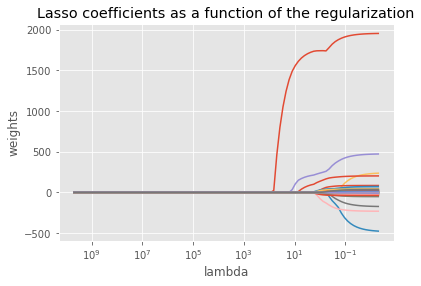

In [169]:
### Exercise 2.2
from sklearn.linear_model import LinearRegression, lars_path, Lasso, LassoCV
lasso=Lasso(max_iter=10000,normalize=True)
alphas=10**np.linspace(10,-2,100)*0.5 # possible lambda for Lasso regression
coefs2=[]
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X),y)
    coefs2.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas, coefs2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

.

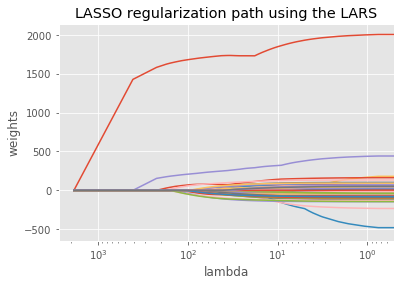

In [170]:
#larper = lars_path(X,y,method="lasso")

alphas, _, coefs3 =lars_path(X, y, method='lasso', verbose=True)


ax = plt.gca()
ax.plot(alphas, coefs3.T)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('LASSO regularization path using the LARS')
plt.show()

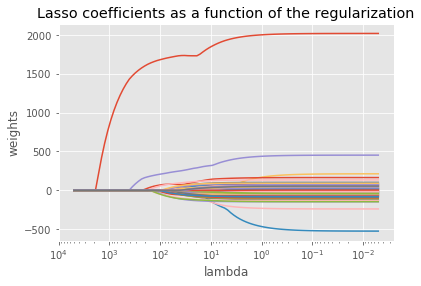

In [188]:
###### here just to get a better look at the Lasso path
from sklearn.linear_model import lasso_path
alphas=10**np.linspace(4,-2,100)*0.5 # possible lambda for Lasso regression
_,coef_path,_=lasso_path(X,y,alphas=alphas)
ax = plt.gca()
ax.plot(alphas, coef_path.T)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

From the first two plots of LASSO and LARS path in Ex. 2.2, no obvious difference can be found actually, though the x-scales differ. To get a better comparison between LARS and Lasso path, another plot is generated based on a smaller range of $\lambda$, as shown in the third plot in Ex.2.2.

For the Lasso path, it is difficult to determine from the plot whether any leaving events exist, but it should be noted that the Lasso plot can illustrate the path of each individual parameter in the model and can provide information of leaving events if one looks the results in detail. A detailed check can show that there are leaving events in the Lasso path, i.e., some parameters go from non-zeros to zeros.

__Exercise 2.3__ (10 pts) Cross-validate the Lasso and compare the results to the answer to 2.1.

In [171]:
lassocv=LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)
lassocv.fit(X_train,y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)
mean_squared_error(y_test,lasso.predict(X_test))

311284.94354203058

$60\%$ and $40\%$ of the original datasets are used for training and testing respectively ( of course,the same datasets are used for Lasso and Ridge regression).Comparing this $MSE$ to the $MSE$ calculated by Ridge regression, the MSE by Lasso regression 
is much smaller. This indicates that for this problem Lasso regression model outperforms the Ridge regression model and can further improve the prediction results.


__Exercise 2.4__ (15 pts) Obtain the 'best' active set from 2.3, and create a new design matrix with only these variables.  Use this to predict the categorical variable $z$ with logistic regression. 

In [172]:
#### model coefficients
index=np.where(abs(lasso.coef_)>0)
pd.Series(lasso.coef_[index])

0     1783.463093
1      155.345301
2      -74.168677
3        2.142500
4      192.324236
5       24.166374
6       -5.797164
7       21.416244
8       -8.298498
9       -6.698633
10       6.338612
11       2.305155
12      10.087665
13     -15.938693
14      -1.841004
15      -5.048517
16       0.491974
17       3.925214
18      -7.743950
19      -7.971769
20      13.978400
21     -40.938003
22     -22.596799
23     -42.385072
24      35.117992
25     -40.437760
26      24.009218
27      21.012320
28      -4.532136
29       1.851018
dtype: float64

In [185]:
index # so in toal 30 variables are selected by cross-validation in Ex.(2.3).

(array([ 0,  2,  6,  7, 14, 15, 19, 22, 23, 24, 32, 33, 40, 42, 44, 45, 47,
        49, 58, 61, 67, 68, 70, 80, 81, 84, 85, 88, 89, 96]),)

In [174]:
X2=X[:,index[0]] # the new design matrix
np.shape(X2)

(750, 30)

In [175]:
#from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
#logreg=linear_model.LogisticRegression(C=1e5)
logreg=LogisticRegression(C=1e5,max_iter=10000)
logreg.fit(X2,z)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [176]:
z_pred=logreg.predict(X2)
np.sum(z_pred==z)

688

In [177]:
X2_train,X2_test,z2_train,z2_test=cross_validation.train_test_split(X2,z,test_size=0.5,random_state=23)

In [183]:
z2_pred1=logreg.predict(X2_test)
float(np.sum(z2_pred1==z2_test))/len(z2_test)

0.9146666666666666

30 variables are selected in the "best-active" model in Ex. 2.3. The prediction results for the test datasets, which is $40\%$ of the original dataset, are fairly good. The rate of correct prediction in the test datasets is $ 91.467\%$.